# Introduction to Band Ratios

Welcome, before we delve into gathering knowledge from band ratios, we must first be on the same page. This notebook will serve as a common starting ground discussing prerequisites and resources to get caught up.

### Data Source 
The data we use for this project is originaly gathered in the form of a time series through EEG which is essentially a graph of voltage recorded through time. See point 1 in the following tutorial.
(https://github.com/voytekresearch/tutorials/blob/master/Exploring%20a%20neural%20oscillation.ipynb) 

### Making Data Usable

Fancy math is used on that time series called the Fourier Transform to change the plot from voltage over time --> power across different frequencies which is called a Power Density Spectrum. (See point 2 in provided tutorial) There are many papers published which draw conclusions about subjects based on their Power Density Spectrum, one subset focuses on band ratios. <br>
https://www.ncbi.nlm.nih.gov/pubmed/20713113 <br>
https://www.ncbi.nlm.nih.gov/pubmed/23086616

### Band Ratios

A Power Density Spectrum (PSD) can be broken down to different "bands" - on the x-axis, if we are only interested in what's going on from frequencies 8-12, we would call that the alpha band. The bands are as follows: delta (1-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), beta (12-30 Hz), low gamma (30-60 Hz), high gamma (60-250 Hz). Band ratios broadly find the power in one band and divide it by the power in another band.

In [3]:
%matplotlib inline

import numpy as np

#import fooof
from fooof.synth import gen_power_spectrum
from fooof import FOOOF
from fooof.analysis import get_band_peak

# Project specific code
from utils.ratios import calc_theta_beta_ratio
from utils.plts import plot_fm_shading

# Generate and explore pairwise comparisons

This project will use fooof to synthesize and analyze PSDs
The following cell sets variables which hold information to create synthetic PSD 

In [4]:
# Power Spectrum Settings
f_range = [3, 40]
bg_params = [1, 1.0]
gauss_params = []

# Ratio Settings
theta_range = [4, 8]
beta_range = [15, 30]

Now that we have all the information stored, let's create those synthetic PSDs

In [8]:
# Generate a couple power spectra
fs, ps = gen_power_spectrum(f_range, bg_params, gauss_params)

In [9]:
fm = FOOOF()

#### Plotting Power Density Spectrum

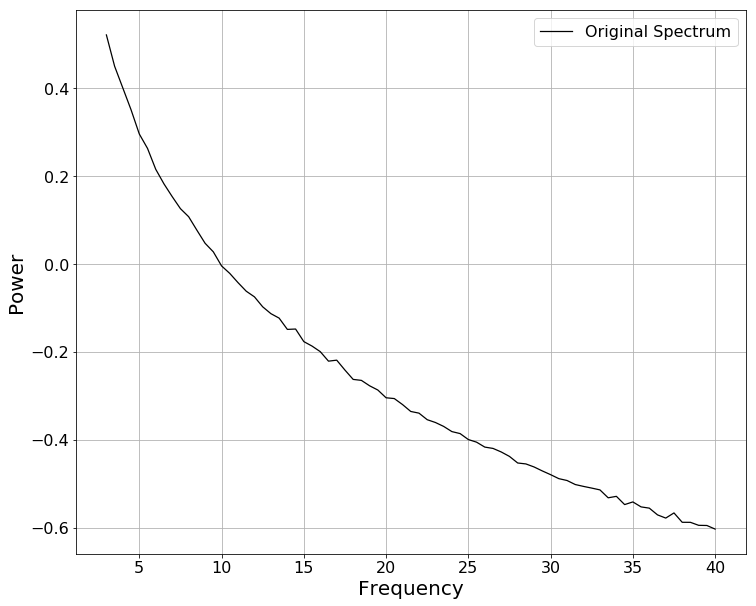

In [10]:
fm.add_data(fs, ps)
fm.plot()

This PSD contain no oscillations. All that is present is an aperiodic background noise which follows a 1/frequency path. Later we will include oscillations in our PSDs which will be shown as "bumps" above the aperiodic background.

## Exploring Oscillations

In [11]:
# Generate a power spectum with canonical oscillation bands
# The last parameter is a list which adds oscillations and 
# follows the repeatable pattern of [central_frequency, amplitude, bandwidth, central_frequency, ... ]
fs, ps1 = gen_power_spectrum(f_range, [1, 1], [6, 0.25, 0.5, 25, 0.5, 1])

# Generate a power spectum with shifted frequency bands: high theta
fs, ps2 = gen_power_spectrum(f_range, [1, 1], [8, 0.25, 0.5, 25, 0.5, 1])

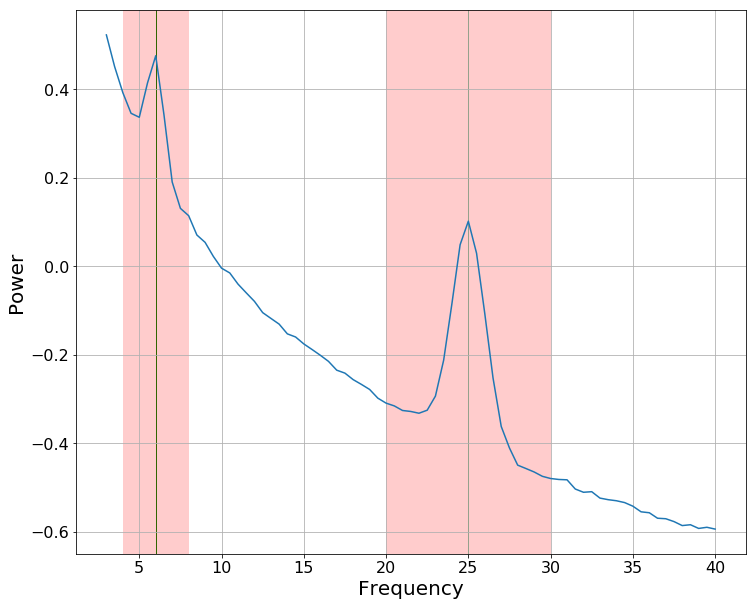

In [12]:
# Plot canonical oscillation band spectrum, with canonical ratio bands shaded
fm.add_data(fs, ps)
plot_fm_shading(fm, [6, 25], [2, 5])

This project will examine if the power in the shaded regions holds any insightful knowledge and what those insights are.